<a href="https://colab.research.google.com/github/patriciacarvalhom/fuzzy/blob/main/Notebook/fuzzy_skfuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
!pip install scikit-fuzzy

In [99]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import skfuzzy as fuzzy
from skfuzzy import*
from skfuzzy import control as ctrl

In [100]:
# Definição das variáveis fuzzy
luminosidade = ctrl.Antecedent(numpy.arange(0, 1801, 1), 'luminosidade_externa')
atividade = ctrl.Antecedent(numpy.arange(0, 3.1, 0.1), 'atividade')
#presenca = ctrl.Antecedent(numpy.arange(0, 1.1, 0.1), 'presenca')
presenca = ctrl.Antecedent(numpy.arange(0, 2, 1), 'presenca')

#incluir modo de seguranca e economia
#pesquisar modos de contenção

In [101]:
# definição da variável de saída
intensidade = ctrl.Consequent(numpy.arange(0, 1801, 1), 'intensidade')

* Baixa: aproximadamente 0 a 700 lúmens
* Média: entre 600 a 1200 lúmens
* Alta: de 1100 a 1800 lúmens
[fonte da tabela base](https://www.archdaily.com.br/br/897537/como-calcular-a-intensidade-de-luz-necessaria-em-seus-ambientes)


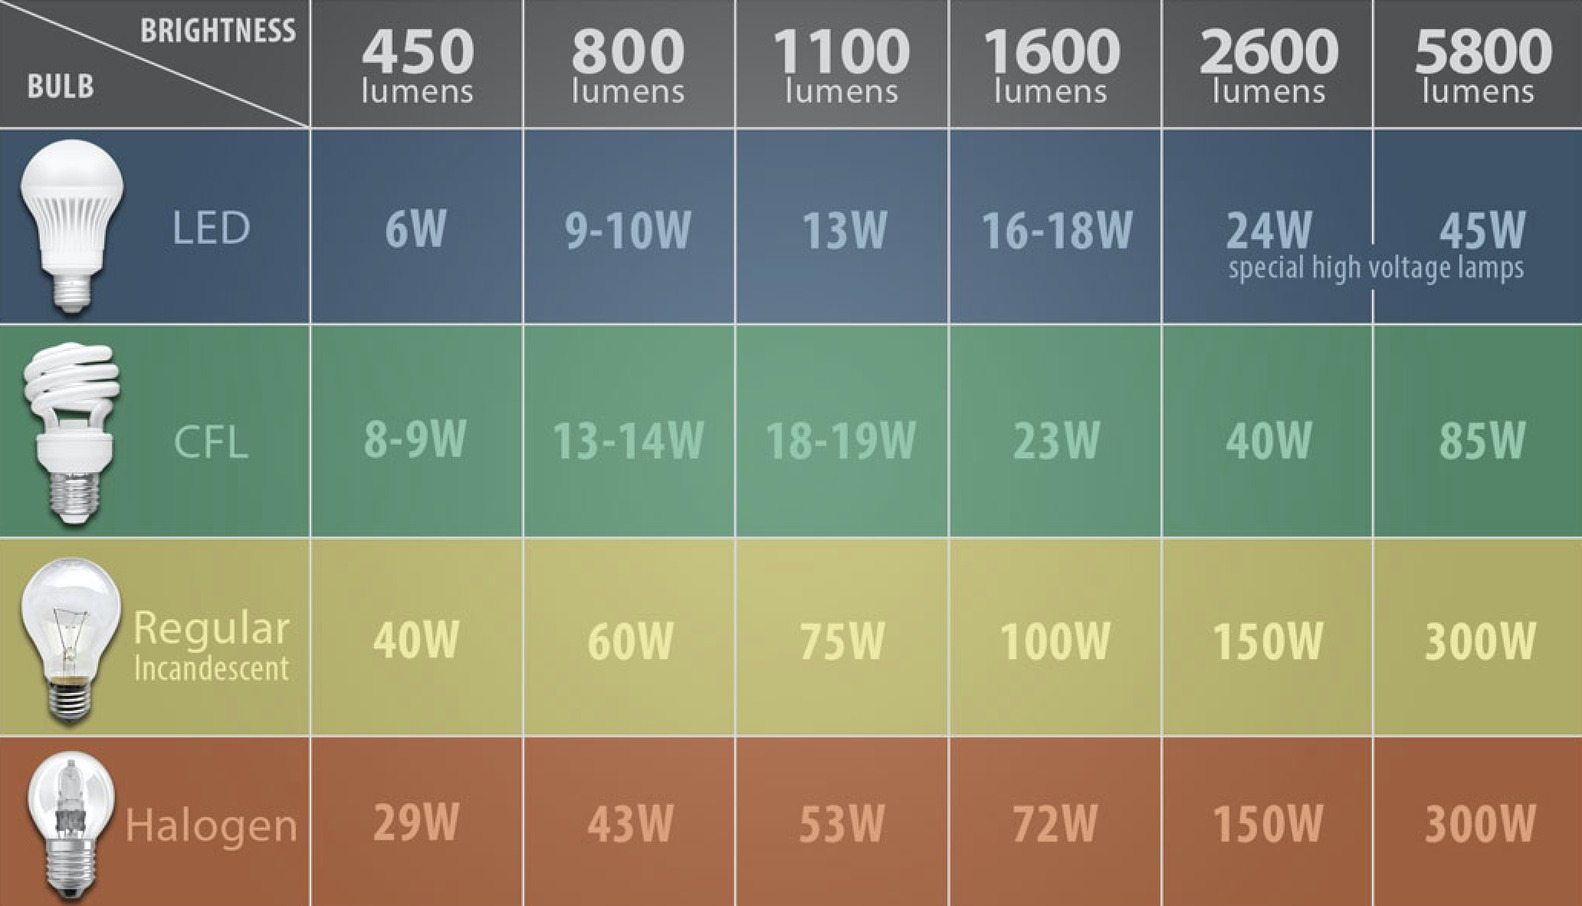

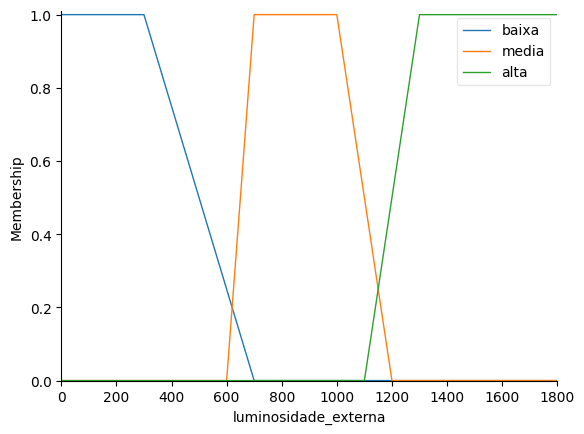

In [102]:
# Funções de pertinência para Luminosidade Externa
# MANTER TUDO TRAPEZOIDAL
luminosidade['baixa'] = fuzzy.trapmf(luminosidade.universe, [0,    0,   300,  700])
luminosidade['media'] = fuzzy.trapmf(luminosidade.universe, [600,  700, 1000, 1200])
luminosidade['alta']  = fuzzy.trapmf(luminosidade.universe, [1100, 1300, 1800, 1800])

luminosidade.view()

A função trapezoidal (trapmf) recebe quatro parâmetros, [a, b, c, d], que determinam o formato do trapézio:

1.   **a:** Início do patamar, onde a pertinência começa a aumentar a partir de zero.
* Para valores menores ou iguais a a, a pertinência é 0.
2. **b:** Início do patamar alto, onde a pertinência atinge 1.
* Entre a e b, a pertinência aumenta linearmente de 0 até 1.
3.   **c:** Final do patamar alto, onde a pertinência começa a diminuir de 1.
* Entre b e c, a pertinência permanece 1 (topo do trapézio).
4. **d:**  Final do patamar, onde a pertinência chega a 0 novamente.
* Entre c e d, a pertinência diminui linearmente de 1 até 0.
* Para valores maiores ou iguais a d, a pertinência é 0 novamente.




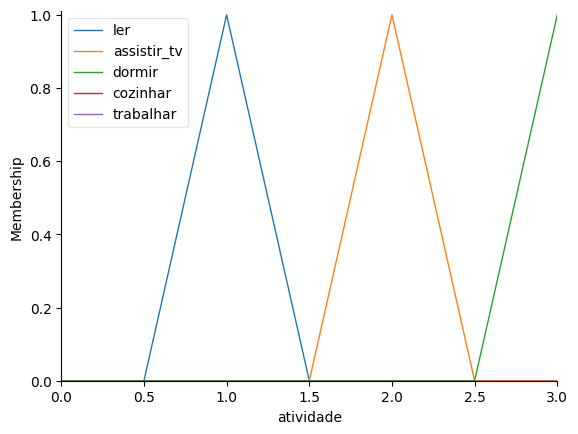

In [103]:
# Funções de pertinência para atividade
# Ler=1, Assistir TV=2, Dormir=3, Cozinhar=4, Trabalhar=5
atividade['ler'] = fuzzy.trapmf(atividade.universe, [0.5, 1, 1, 1.5])
atividade['assistir_tv'] = fuzzy.trapmf(atividade.universe, [1.5, 2, 2, 2.5])
atividade['dormir'] = fuzzy.trapmf(atividade.universe, [2.5, 3, 3, 3.5])
atividade['cozinhar'] = fuzzy.trapmf(atividade.universe, [3.5, 4, 4, 4.5])
atividade['trabalhar'] = fuzzy.trapmf(atividade.universe, [4.5, 5, 5, 5.5])
atividade.view()

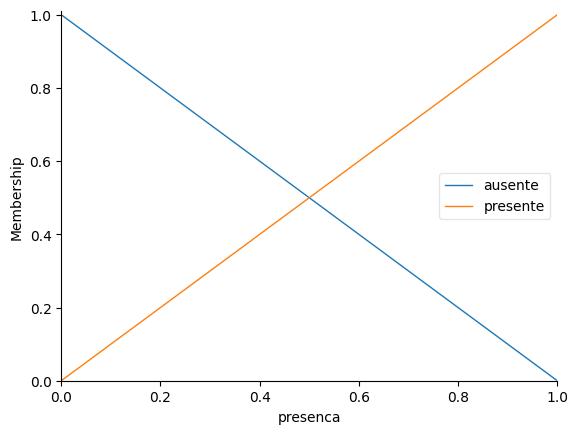

In [104]:
# Presença (0 = ausente, 1 = presente)
# ALTERAR PARA SINGLETON, OU TRIÂNGULO O MAIS FINO POSSÍVEL

presenca['ausente'] = fuzzy.trapmf(presenca.universe, [0, 0, 0.2, 0.4])
presenca['presente'] = fuzzy.trapmf(presenca.universe, [0.6, 0.8, 1, 1])
presenca.view()


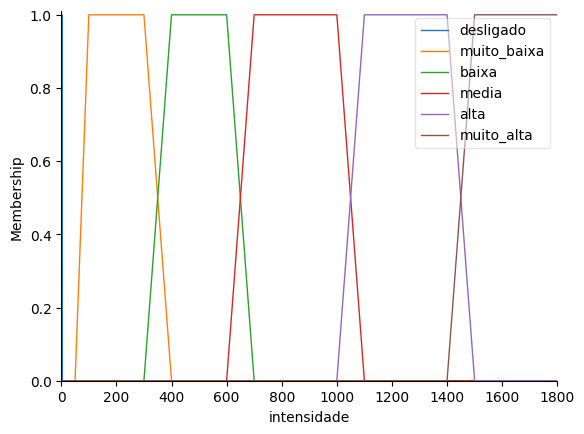

In [105]:
# Intensidade da iluminação

intensidade['desligado'] = fuzzy.trimf(intensidade.universe, [1, 2, 3])
# desligado foi definido dessa forma para representar um singleton
intensidade['muito_baixa'] = fuzzy.trapmf(intensidade.universe, [50, 100, 300, 400])
intensidade['baixa']       = fuzzy.trapmf(intensidade.universe, [300, 400, 600, 700])
intensidade['media']       = fuzzy.trapmf(intensidade.universe, [600, 700, 1000, 1100])
intensidade['alta']        = fuzzy.trapmf(intensidade.universe, [1000, 1100, 1400, 1500])
intensidade['muito_alta']  = fuzzy.trapmf(intensidade.universe, [1400, 1500, 1800, 1800])
intensidade.view()

In [106]:
# Regras

regras = [
    ctrl.Rule(atividade['dormir'], intensidade['desligado']),
    ctrl.Rule(presenca['ausente'], intensidade['desligado']),
    ctrl.Rule(atividade['assistir_tv'] & luminosidade['baixa'] & presenca['presente'], intensidade['media']),
    ctrl.Rule(atividade['assistir_tv'] & luminosidade['media'] & presenca['presente'], intensidade['baixa']),
    ctrl.Rule(atividade['assistir_tv'] & luminosidade['alta'] & presenca['presente'], intensidade['muito_baixa']),
    ctrl.Rule(atividade['ler'] & luminosidade['baixa'] & presenca['presente'], intensidade['muito_alta']),
    ctrl.Rule(atividade['ler'] & luminosidade['media'] & presenca['presente'], intensidade['alta']),
    ctrl.Rule(atividade['ler'] & luminosidade['alta'] & presenca['presente'], intensidade['media']),
    ctrl.Rule(atividade['trabalhar'] & luminosidade['baixa'] & presenca['presente'], intensidade['muito_alta']),
    ctrl.Rule(atividade['trabalhar'] & luminosidade['media'] & presenca['presente'], intensidade['alta']),
    ctrl.Rule(atividade['trabalhar'] & luminosidade['alta'] & presenca['presente'], intensidade['media']),
    ctrl.Rule(atividade['cozinhar'] & luminosidade['baixa'] & presenca['presente'], intensidade['alta']),
    ctrl.Rule(atividade['cozinhar'] & luminosidade['media'] & presenca['presente'], intensidade['media']),
    ctrl.Rule(atividade['cozinhar'] & luminosidade['alta'] & presenca['presente'], intensidade['baixa']),
]

In [107]:
# Sistema de controle fuzzy
sistema = ctrl.ControlSystem(regras)
simulador = ctrl.ControlSystemSimulation(sistema)

In [108]:
# Exemplo de uso
simulador.input['luminosidade_externa'] = 150
simulador.input['atividade'] = 1
simulador.input['presenca'] = 1

In [109]:
#try:
 #   simulador.compute()
  #  print(f"Intensidade da iluminação recomendada: {simulador.output['intensidade']:.2f}")
#except KeyError as e:
 #   print(f"Erro: {e}")
  #  print("Nenhuma regra foi ativada. Verifique os valores de entrada.")

Intensidade da iluminação recomendada: 1623.81


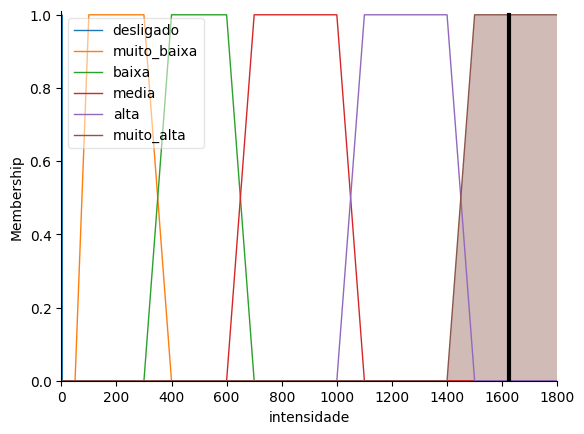

In [110]:
# Computar saída
simulador.compute()
print(f"Intensidade da iluminação recomendada: {simulador.output['intensidade']:.2f}")
# resultado da defuzzificação e onde o valor nítido obtido se encontra no universo da saída
intensidade.view(sim=simulador)

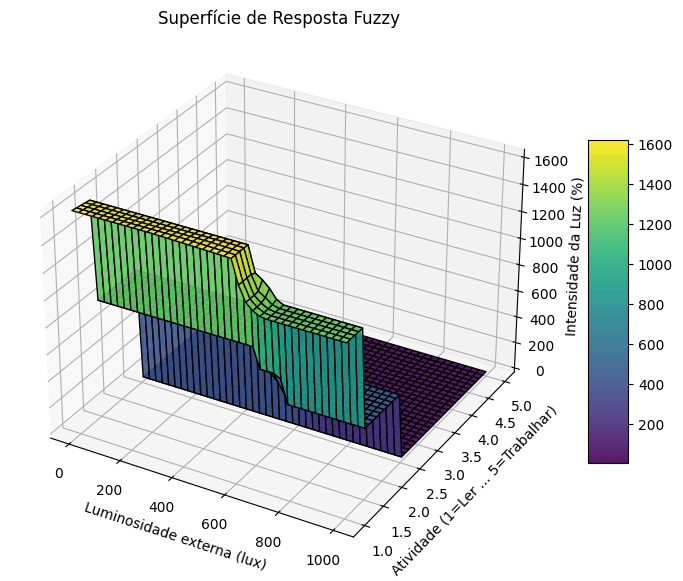

In [111]:
#superficie de resposta 3d inferência
# pesquisar se dá pra usar essas simulações pro desvio padrão
# Eixo x: luminosidade, eixo y: atividade, z: intensidade da luz
num = 40  # resolução
luminosidade_range = numpy.linspace(0, 1000, num)
atividade_range = numpy.linspace(1, 5, num)
# pq não numpy.arrange()?
# 1=ler,5=trabalhar
X, Y = numpy.meshgrid(luminosidade_range, atividade_range)
Z = numpy.zeros_like(X)

# Fixando presença como 'presente' em todas as simulações

for i in range(num):
    for j in range(num):
        simulador = ctrl.ControlSystemSimulation(sistema)
        simulador.input['luminosidade_externa'] = X[i, j]
        simulador.input['atividade'] = Y[i, j]
        simulador.input['presenca'] = 1
        try:
            simulador.compute()
            Z[i, j] = simulador.output['intensidade']
        except KeyError:
            Z[i, j] = numpy.nan


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.9)
ax.set_xlabel('Luminosidade externa (lux)')
ax.set_ylabel('Atividade (1=Ler ... 5=Trabalhar)')
ax.set_zlabel('Intensidade da Luz (%)')
ax.set_title('Superfície de Resposta Fuzzy')
fig.colorbar(surf, shrink=0.6, aspect=8)
plt.show()



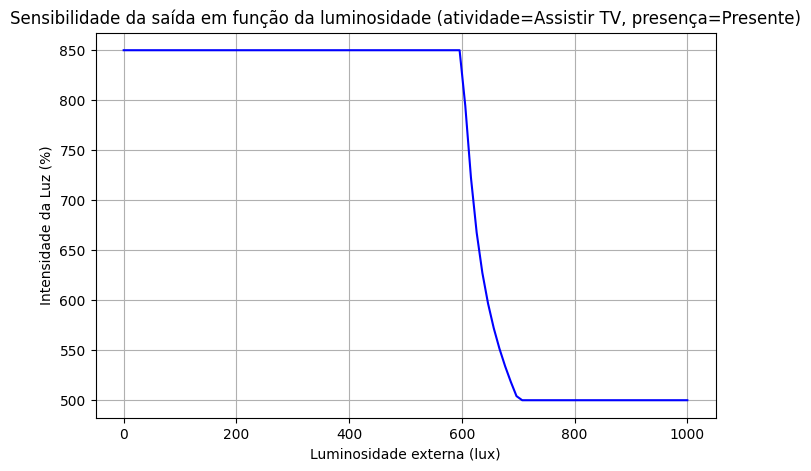

In [112]:
# CURVA DE SENSIBILIDADE (2D)
# -------------------------------
luminosidade_range = numpy.linspace(0, 1000, 100)
saida = []
atividade_fixa = 2  # Por exemplo, 2 = Assistir TV
for l in luminosidade_range:
    simulador = ctrl.ControlSystemSimulation(sistema)
    simulador.input['luminosidade_externa'] = l
    simulador.input['atividade'] = atividade_fixa
    simulador.input['presenca'] = 1
    simulador.compute()
    saida.append(simulador.output['intensidade'])

plt.figure(figsize=(8,5))
plt.plot(luminosidade_range, saida, color='b')
plt.xlabel('Luminosidade externa (lux)')
plt.ylabel('Intensidade da Luz (%)')
plt.title('Sensibilidade da saída em função da luminosidade (atividade=Assistir TV, presença=Presente)')
plt.grid(True)
plt.show()

In [113]:
#simulando conjunto de entradas e resultados para fazer o desvio padrão

In [114]:
# gráfico do desvio padrão

Lúmen: medida de fluxo luminoso (luz emitida)

Lux: medida de luz distribuída numa superfície (luz recebida)

Como vamos recomendar o nível de luminosidade (mais comumente chamada claridade) ou seja, o resultado da iluminação e não a luz emitida, utiliza-se lux.  

Lux = lumen / m²

Comparando com a NBR/ISO 8995-ILUMINAÇÃO EM AMBIENTES DE TRABALHO, disponível em: [norma](https://paginapessoal.utfpr.edu.br/vilmair/instalacoes-prediais-1/normas-e-tabelas-de-dimensionamento/NBRISO_CIE8995-1.pdf/view)

atividade/lux recomendada

* salas de descanso: 100-200   
* cozinha : 500
* escritório: 500-750  
* sala de leitura: 500  


In [115]:
#gráfico de erro absoluto (comparar com padrão de iluminação da nbr)
# fixar a área em m2